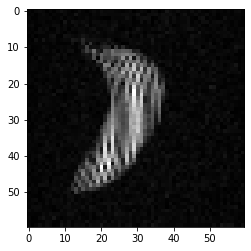

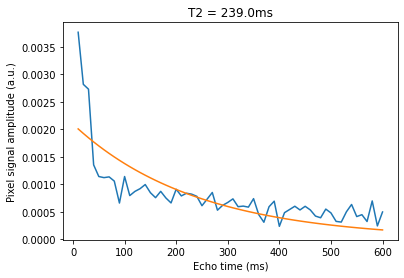

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import curve_fit

def func(x, m, t2):
    # Función de ajuste
    return m * np.exp(-x / t2)

def getT2(path, nEchos = 60, echoSpacing = 10): # nEchos es el número de ecos, todas 60 menos la del día 1, que tiene 30 (pero con doble tiempo entre ecos). Echo spacing es 20 el primer día
    rawData = scipy.io.loadmat(path)    # Load your rawData here
    imagen = np.abs(rawData['imagen'])
    nPoints = [60, 60, 4] # Las imágenes del día 4 y 5 tienen un solo slice, luego no son válidas para el análisis
    imagen2d = np.squeeze(imagen[2, :, :]) # Tomo el segundo slice para los cálculos

    # Aquí paso las diferentes imagenes una matriz de 3 dimensioens, la primera dimensión da cuenta del echo
    imagen3d = np.zeros((nEchos, nPoints[1], nPoints[0]))
    for echo in range(nEchos):
        imagen3d[echo, :, :] = imagen2d[:, nPoints[0]*echo:nPoints[0]*echo+nPoints[0]]

    # tVector = np.linspace(echoSpacing, nEchos*echoSpacing, nEchos) # ms, Vector de tiempos de echo
    tVector = (np.arange(0,nEchos)+1)*echoSpacing
    sVector = imagen3d[:, 30, 33]   # Uso el pixel (35, 30) para este rawData. Comprobar el pixel en la figura 2D para cada rawData
    fitData, xxx = curve_fit(func, tVector, sVector)    # Ajuste a la función definida en func
    T2 = fitData[1] # ms, T2 obtenido en el ajuste

    # Mapa 2D del primer echo. Usar para ver el pixel en que se quiere obtener T2
    plt.figure(1)
    plt.imshow(np.squeeze(imagen3d[10, :, :]), cmap='gray') # Primer echo, podrías explorar varios para ver

    # Plot de datos experimentales y curva de ajuste
    plt.figure(2)
    plt.plot(tVector, sVector, tVector, func(tVector, *fitData))
    plt.ylabel('Pixel signal amplitude (a.u.)')
    plt.xlabel('Echo time (ms)')
    plt.title('T2 = ' + str(np.around(T2)) + 'ms')

    plt.show()

getT2('C:/Users/juanr/Desktop/Universidad/Master/Practicas/programa calculo t1t2/NMR-t1-t2-calculator/t2_banana_data/Outside/MSE.2022.04.07.16.07.50')

# Evolution


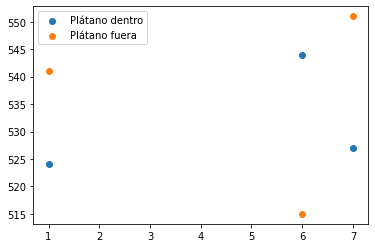

In [18]:
import matplotlib.pyplot as plt

dias = [1,6,7]
platano_in = [524.0,544.0,527.0]
platano_out = [541.0, 515.0, 551.0]

plt.figure(1)
plt.scatter(dias, platano_in)
plt.scatter(dias, platano_out)
plt.legend(['Plátano dentro', 'Plátano fuera'])
plt.savefig('evolucion_platanos_t2', dpi = 'figure')
plt.show()